<a href="https://colab.research.google.com/github/rafaelhamer/DSWP/blob/master/Labdata_Churn_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

def mostra_missing_value(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = 100*round((df.isnull().sum()/df.isnull().count()).sort_values(ascending = False), 2)
    missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percentual'])
    print(missing_data.head(10))

from google.colab import drive
drive.mount('/gdrive')

## Lendo os dados de Treino e Teste

In [105]:
df_train = pd.read_csv('/gdrive/My Drive/Python/treino_limpo2.csv', index_col='id')
df_test  = pd.read_csv('/gdrive/My Drive/Python/teste_limpo2.csv', index_col='id')

df_train.dtypes

In [ ]:
mostra_missing_value(df_train)

In [ ]:
mostra_missing_value(df_test)

In [151]:
df_train.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,Partner_num,Dependents_num,PhoneService_num,MultipleLines_num,InternetService_num,OnlineSecurity_num,OnlineBackup_num,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovies_num,Contract_num,PaperlessBilling_num,PaymentMethod_num
id,,,,,,,,,,,,,,,,,,
4030,0,56.000000,45.05,0,0,0,0,1,0,2,2,2,2,0,0,2,0,4
6731,0,16.928753,19.65,0,1,1,1,0,2,1,1,1,1,1,1,1,0,3
6479,0,60.000000,110.80,0,1,0,1,2,1,0,2,2,2,2,2,2,1,1
6861,0,37.000000,101.90,1,0,0,1,2,1,0,2,2,0,2,2,0,1,0
3266,0,29.000000,70.75,1,1,1,1,0,1,0,0,0,0,0,0,0,1,2


In [152]:
df_test.head()

,SeniorCitizen,tenure,MonthlyCharges,Partner_num,Dependents_num,PhoneService_num,MultipleLines_num,InternetService_num,OnlineSecurity_num,OnlineBackup_num,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovies_num,Contract_num,PaperlessBilling_num,PaymentMethod_num
0,0,23.0,20.00,1,1,1,0,2,1,1,1,1,1,1,1,1,1
1,1,61.0,99.00,1,1,1,2,1,0,2,0,0,2,2,1,0,4
2,0,36.0,84.75,0,0,1,2,1,0,0,0,0,0,2,0,1,2
3,0,61.0,61.45,1,1,0,1,0,0,2,2,2,2,2,2,1,0
4,0,47.0,20.55,0,0,1,0,2,1,1,1,1,1,1,2,1,3


In [ ]:
!pip install pycaret

from pycaret.utils import enable_colab
from pycaret.datasets import get_data
from pycaret.classification import *
enable_colab()

In [153]:
data = df_train.sample(frac=1, random_state=786)
#data_unseen = dataset.drop(data.index)
data_unseen = df_test
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5634, 18)
Unseen Data For Predictions: (1409, 17)


In [154]:
classification_setup = setup(data = data, target = 'Churn')

,Description,Value
0,session_id,2414
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5634, 18)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,15
8,Ordinal Features,False
9,High Cardinality Features,False


In [117]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8083,0.8525,0.7353,0.8019,0.8032,0.4920,0.4956,0.213
gbc,Gradient Boosting Classifier,0.8065,0.8509,0.7300,0.7994,0.8007,0.4844,0.4885,0.456
lr,Logistic Regression,0.8052,0.8506,0.7303,0.7983,0.7999,0.4832,0.4866,0.600
lda,Linear Discriminant Analysis,0.8047,0.8471,0.7370,0.7997,0.8011,0.4896,0.4916,0.034
ridge,Ridge Classifier,0.8040,0.0000,0.7203,0.7955,0.7963,0.4704,0.4766,0.019
catboost,CatBoost Classifier,0.8024,0.8444,0.7225,0.7946,0.7959,0.4711,0.4758,3.433
lightgbm,Light Gradient Boosting Machine,0.7981,0.8401,0.7228,0.7915,0.7929,0.4660,0.4694,0.116
rf,Random Forest Classifier,0.7854,0.8166,0.6973,0.7749,0.7771,0.4206,0.4257,0.705
xgboost,Extreme Gradient Boosting,0.7844,0.8231,0.7095,0.7782,0.7801,0.4350,0.4371,0.816
knn,K Neighbors Classifier,0.7728,0.7865,0.6968,0.7666,0.7687,0.4066,0.4082,0.132


In [118]:
print(best_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)


In [119]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [160]:
melhor_modelo = create_model('catboost')
modelo_refinado = tune_model(melhor_modelo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8000,0.8276,0.7089,0.7896,0.7915,0.4491,0.4550
1,0.8304,0.8642,0.7508,0.8233,0.8239,0.5358,0.5416
2,0.8152,0.8824,0.7154,0.8061,0.8031,0.4779,0.4918
3,0.8122,0.8451,0.7174,0.8024,0.8021,0.4750,0.4847
4,0.8249,0.8641,0.7290,0.8170,0.8142,0.5056,0.5185
5,0.8147,0.8371,0.7160,0.8052,0.8034,0.4769,0.4891
6,0.8249,0.8602,0.7412,0.8171,0.8175,0.5185,0.5253
7,0.8198,0.8628,0.7438,0.8128,0.8144,0.5140,0.5175
8,0.8046,0.8580,0.7031,0.7934,0.7926,0.4483,0.4597
9,0.7817,0.8126,0.6905,0.7707,0.7739,0.4056,0.4096


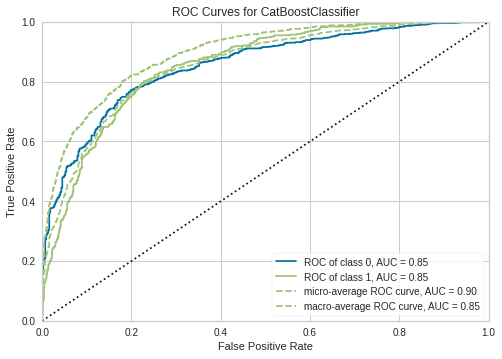

In [161]:
plot_model(modelo_refinado, plot = 'auc')

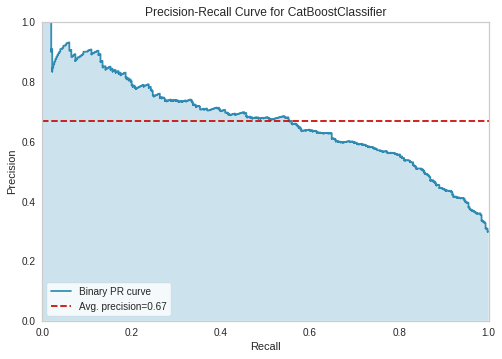

In [162]:
plot_model(modelo_refinado, plot='pr')

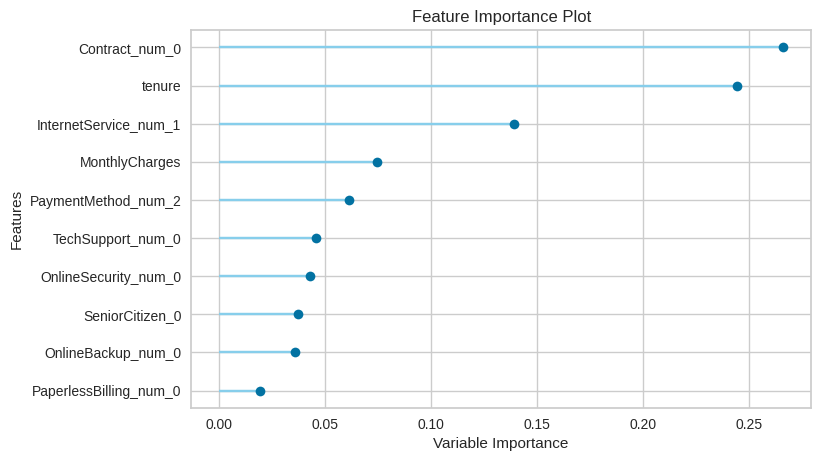

In [125]:
plot_model(modelo_refinado, plot='feature')

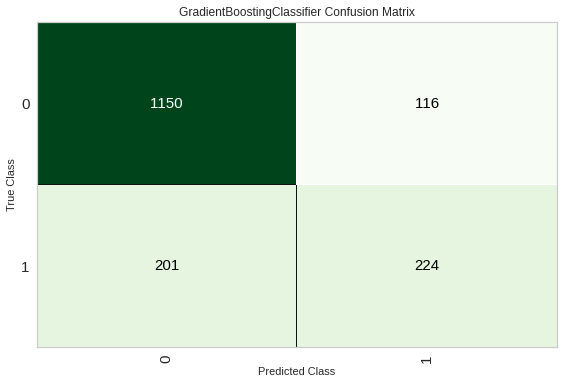

In [126]:
plot_model(modelo_refinado, plot = 'confusion_matrix')

In [ ]:
#evaluate_model(modelo_refinado)

In [156]:
predict_model(modelo_refinado, data=data_unseen);

CatBoostError: ignored

In [147]:
modelo_final = finalize_model(modelo_refinado)
print(modelo_final)

In [148]:
modelo_final.get_all_params()

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'class_names': [0, 1],
 'classes_count': 0,
 'depth': 2,
 'eval_metric': 'Logloss',
 'feature_border_type': 'GreedyLogSum',
 'grow_policy': 'SymmetricTree',
 'iterations': 300,
 'l2_leaf_reg': 6,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 10,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.029999999329447743,
 'loss_function': 'Logloss',
 'max_leaves': 4,
 'min_data_in_leaf': 1,
 'model_shrink_mode': 'Constant',
 'model_shrink_rate': 0,
 'model_size_reg': 0.5,
 'nan_mode': 'Min',
 'penalties_coefficient': 1,
 'posterior_sampling': False,
 'random_seed': 123,
 'random_strength': 0.30000001192092896,
 'rsm': 1,
 'sampling_frequency': 'PerTree',
 'score_function': 'Cosine',
 'sparse_features_conflict_fraction': 0,
 'subsample': 0.80000

In [130]:
predict_model(modelo_final);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8155,0.8587,0.7213,0.806,0.8081,0.4744,0.4795


In [ ]:
!pip install shap

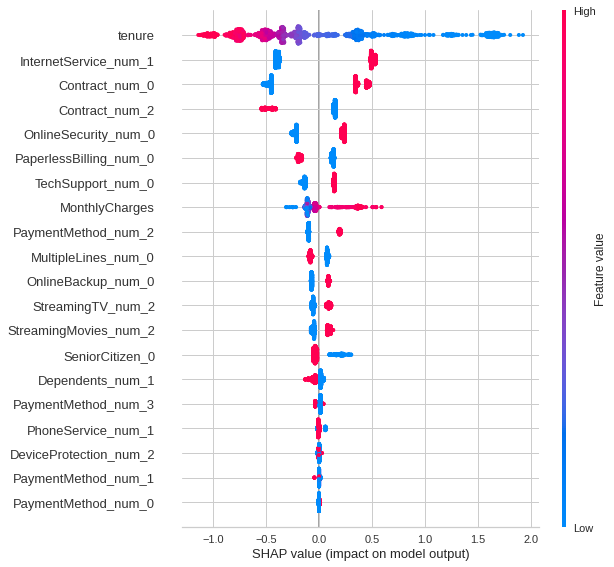

In [149]:
interpret_model(modelo_final)

In [ ]:
unseen_predictions = predict_model(final_ada, data=data_unseen)
unseen_predictions.head()

In [132]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Churn, unseen_predictions.Label, 'Accuracy')

AttributeError: ignored